# Dataset

This project uses the kaggle facial expression recognition dataset.  This dataset will be used for many of lazyprogrammer's deep learning courses.  In this case, I'm going to apply logistic regression to predict the first two classes (emotions).

The dataset is a csv which contains three columns:
1. label, emotion:
    * 0 = Angry
    * 1 = Disgust
    * 2 = Fear
    * 3 = Happy
    * 4 = Sad
    * 5 = Surprise
    * 6 = Neutral
2. pixels, 48 x 48 space separated grayscale
3. train or test set 

The data has been preprocessed so the faces are centered and each face occupies roughly the same amount of space within the image.

## Visualize Data

Below I'm going to take a look at a few examples of each label.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#importing a function that loads, shuffles and splits data
from util import getData

#class order
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

Xtrain, Ytrain, Xtest, Ytest = getData(balance_ones=False)


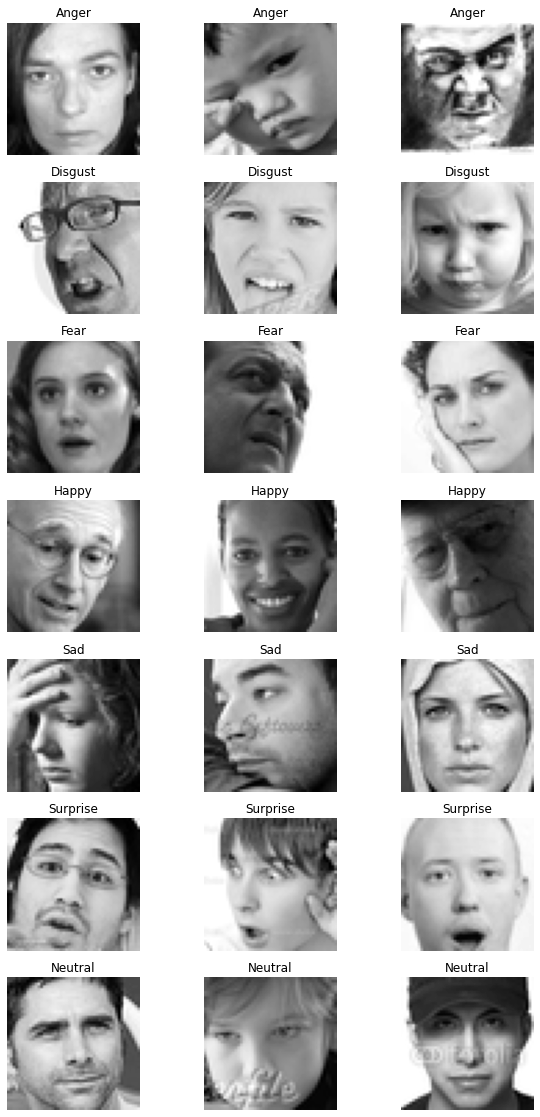

In [2]:
fig = plt.figure(figsize=(10, 20))
num_examples = 3

plot_num = 1
for i in range(len(label_map)):
   x, y = Xtrain[Ytrain==i], Ytrain[Ytrain==i] 
   
   for j in range(num_examples):
       fig.add_subplot(len(label_map), num_examples, plot_num)
       plt.imshow(x[j].reshape(48, 48), cmap = 'gray')
       plt.axis('off')
       plt.title(label_map[y[j]])
       plot_num += 1

plt.show()

## Biased Data

Since we're simply looking at classes 0 and 1, we can clearly see there is an issue - 4,806 observations of class 0 and only 529 observations of class 1.

In [3]:
pd.Series(Ytrain).value_counts()

3    8732
6    6022
4    5922
2    4980
0    4808
5    3889
1     534
dtype: int64

## Other issues

Since logistic regression is simply a linear combination of weights, e.g. works with flat vectors, no relationship between spatial position is retained.  Most neural networks work this way too, except for convolutional neural networks (CNN).

Normalizaiton is needed - pixel intensities 0 - 255 and we need 0 - 1 because this is where the functions of the neural networks are the most sensitive. 

# Set Up Model

I'm setting up the model as a class, similar to sklearn here.

In [10]:
from sklearn.utils import shuffle
from util import getBinaryData, sigmoid, sigmoid_cost, error_rate

#code out logistic regression as class, similar to sklearn
class LogisticModel(object):
    #nothing really to do on initialization
    def __init__(self):
        pass

    #set up model fit
    def fit(self, X, Y, learning_rate=10e-7, reg=0, epochs=10000, show_fig=False):
        #shuffle and split data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000]
        X, Y = X[:-1000], Y[:-1000]

        #get shape of X
        N, D = X.shape

        #initialize weights
        self.W = np.random.randn(D) / np.sqrt(D)
        self.b = 0

        #initialize for training
        costs = []
        best_validation_error = 1

        #train model
        for i in range(epochs):
            pY = self.forward(X)

            #gradient descent step, including regularization
            self.W -= learning_rate*(X.T.dot(pY - Y) + reg*self.W)
            self.b -= learning_rate*((pY - Y).sum() + reg*self.b)

            #every 20 steps calculate cost of validation set
            if i % 20 == 0:
                pYvalid = self.forward(Xvalid)
                c = sigmoid_cost(Yvalid, pYvalid)
                costs.append(c)
                e = error_rate(Yvalid, np.round(pYvalid))

                #print some debugging help
                print('i:', i, 'cost:', c, 'error:', e)

                #keep track of best validation error
                if e < best_validation_error:
                    best_validation_error = e
        
        print('best_validation_error:', best_validation_error)

        #plot costs
        if show_fig:
            plt.plot(costs)
            plt.show()
    
    #evaluate log reg to get pY
    def forward(self, X):
        return sigmoid(X.dot(self.W) + self.b)

    #return predicted class for given X
    def predict(self, X):
        pY = self.forward(X)
        return np.round(pY)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

# Train Model

As a resolution to the class imabalance problem, I'm going to first repeat all class 1 data 9 times before using it to train the model.

In [5]:
X, Y = getBinaryData()

#repeat class 1
X0 = X[Y==0, :]
X1 = X[Y==1, :]
X1 = np.repeat(X1, 9, axis=0)
X = np.vstack([X0, X1])
Y = np.array([0]*len(X0) + [1]*len(X1))

Now I can use my model as I would an object from sklearn.

i: 0 cost: 674.7068273510263 error: 0.413
i: 20 cost: 673.1026828450471 error: 0.393
i: 40 cost: 678.1715141252921 error: 0.419
i: 60 cost: 683.532206030512 error: 0.43
i: 80 cost: 688.8600961358906 error: 0.445
i: 100 cost: 694.0011964934729 error: 0.448
i: 120 cost: 698.8873949254681 error: 0.449
i: 140 cost: 703.4945525048482 error: 0.456
i: 160 cost: 707.820998075726 error: 0.464
i: 180 cost: 711.876268672065 error: 0.47
i: 200 cost: 715.675154621724 error: 0.469
i: 220 cost: 719.2345412809708 error: 0.473
i: 240 cost: 722.5717436315665 error: 0.475
i: 260 cost: 725.7036452392562 error: 0.474
i: 280 cost: 728.6462734741508 error: 0.477
i: 300 cost: 731.4146120525661 error: 0.477
i: 320 cost: 734.0225423133318 error: 0.479
i: 340 cost: 736.4828534282608 error: 0.479
i: 360 cost: 738.8072883683521 error: 0.482
i: 380 cost: 741.0066071259521 error: 0.482
i: 400 cost: 743.0906568690455 error: 0.484
i: 420 cost: 745.0684433020657 error: 0.484
i: 440 cost: 746.9482001164583 error: 0.483


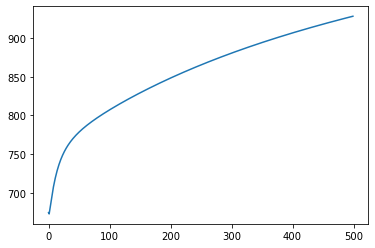

TypeError: score() missing 2 required positional arguments: 'X' and 'Y'

In [11]:
model = LogisticModel()
model.fit(X, Y, show_fig=True)

print('Final Score = ', model.score())

Ok, that was pretty bad, the cost term constantly increased.  Clearly I'm going to have to make some changes.